# Evaluating Logistic Regression Models - Lab

## Introduction

 In regression, you are predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, a model is either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [78]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
#Your code here
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y) 


## 2. Create a standard logistic regression model

In [80]:
#Your code here
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 1e12)
LR.fit(X_train,y_train)

train_predictions = LR.predict(X_train)
test_predictions = LR.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3. Write a function to calculate the precision

In [81]:
def precision(y_hat, y):
    
    #Your code here
    y = list(y)
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)):
        if y_hat[i]==1 and y[i]==1:
            tp+=1
        elif y_hat[i]==1 and y[i]==0:
            fp+=1
        elif y_hat[i]==0 and y[i]==0:
            tn+=1
        else:
            fn+=1
    return tp/(tp+fp) 

## 4. Write a function to calculate the recall

In [82]:
def recall(y_hat, y):
    #Your code here
    y = list(y)
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)):
        if y_hat[i]==1 and y[i]==1:
            tp+=1
        elif y_hat[i]==1 and y[i]==0:
            fp+=1
        elif y_hat[i]==0 and y[i]==0:
            tn+=1
        else:
            fn+=1
    return (tp)/(tp+fn) 

## 5. Write a function to calculate the accuracy

In [83]:
def accuracy(y_hat, y):
    #Your code here
    y = list(y)
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)):
        if y_hat[i]==1 and y[i]==1:
            tp+=1
        elif y_hat[i]==1 and y[i]==0:
            fp+=1
        elif y_hat[i]==0 and y[i]==0:
            tn+=1
        else:
            fn+=1
    return (tp + tn)/(tp+fn+tn+fp)

## 6. Write a function to calculate the F1-score

In [84]:
def f1_score(y_hat,y):
    #Your code here
    y = list(y)
    
    pr = precision(y_hat, y)
    re = recall(y_hat, y)
    
    return (pr * re) / (pr + re)

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the training and the test set

In [86]:
#Your code here
print("train precision: ", precision(train_predictions, y_train))
print("train recall: ", recall(train_predictions, y_train))
print("train accuracy: ", accuracy(train_predictions, y_train))
print("train f1: ", f1_score(train_predictions, y_train))
print("\n")
print("test precision: ", precision(test_predictions, y_test))
print("test recall: ", recall(test_predictions, y_test))
print("test accuracy: ", accuracy(test_predictions, y_test))
print("test f1: ", f1_score(test_predictions, y_test))

train precision:  0.855072463768116
train recall:  0.9291338582677166
train accuracy:  0.8722466960352423
train f1:  0.44528301886792454


test precision:  0.7142857142857143
test recall:  0.9210526315789473
test accuracy:  0.7763157894736842
test f1:  0.40229885057471265


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [87]:
#Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("train precision: ", precision_score(train_predictions, y_train))
print("train recall: ", recall_score(train_predictions, y_train))
print("train accuracy: ", accuracy_score(train_predictions, y_train))
print("train f1: ", f1_score(train_predictions, y_train))
print("\n")
print("test precision: ", precision_score(test_predictions, y_test))
print("test recall: ", recall_score(test_predictions, y_test))
print("test accuracy: ", accuracy_score(test_predictions, y_test))
print("train f1: ", f1_score(test_predictions, y_test))



train precision:  0.9291338582677166
train recall:  0.855072463768116
train accuracy:  0.8722466960352423
train f1:  0.8905660377358491


test precision:  0.9210526315789473
test recall:  0.7142857142857143
test accuracy:  0.7763157894736842
train f1:  0.8045977011494253


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different train set sizes. What do you notice?

In [90]:
importimport  matplotlib.pyplotmatplot as plt
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-90-c137a27fb9bf>, line 1)

In [105]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
    training_F1.append(f1_score(y_hat_train,y_train))
    testing_F1.append(f1_score(y_hat_test,y_test))
    

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, testing and training accuracy in the third one, and testing and training f1-score in the fourth one.

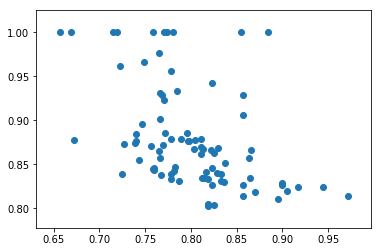

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
# code for test and train precision
plt.scatter(testing_Precision, training_Precision)

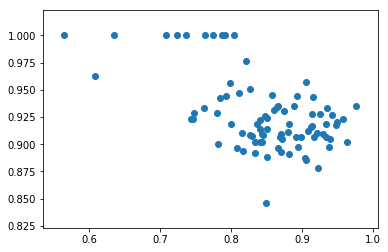

In [109]:
# code for test and train recall
plt.scatter(testing_Recall, training_Recall)

In [ ]:
# code for test and train accuracy

In [ ]:
# code for test and train F1-score

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.